Import pandas library

In [4]:
import pandas as pd

Read in csv data from the project

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/dxzys/Gun-Violence-Data/refs/heads/main/data/gva_master.csv')

View five latest incidents

In [6]:
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,latitude,longitude
0,3303232,"September 7, 2025",Tennessee,Memphis,Rosewind Cir,0,4,0,0,0,NaN,35.143378,-90.052136
1,3303073,"September 7, 2025",Ohio,Cleveland,1051 W 10th St,0,5,0,0,0,NaN,41.505141,-81.691457
2,3302748,"September 7, 2025",Texas,Cleveland,2843 County Rd 5018,1,5,0,0,0,NaN,30.341049,-95.077473
3,3302041,"September 6, 2025",Virginia,Portsmouth,Manly St and Dahlia St S,1,3,0,0,0,NaN,36.833873,-76.297735
4,3297408,"August 29, 2025",Florida,Fort Lauderdale,657 NW 9th St,0,4,0,0,0,NaN,26.124163,-80.143586


Say we want to calculate the total amount of victims killed or injured throughout all incidents. We'll use `.sum()` for this.

(If I want the total casualty counts, I can add killed + injured totals then return that as well)

In [7]:
total_killed = df['Victims Killed'].sum()
total_injured = df['Victims Injured'].sum()

print(f'Total Victims Killed: {total_killed}')
print(f'Total Victims Injured: {total_injured}')

Total Victims Killed: 5782
Total Victims Injured: 23883


Let's say we want to find the incident with the highest number of victims killed (2017 Las Vegas shooting). We'll use `.idxmax()` to locate the index for the maximum value in a column (in this case Victims Killed), then `.loc[]` will show us the entire row matching this index label.

In [5]:
df.loc[df['Victims Killed'].idxmax()]

,4221
Incident ID,946496
Incident Date,"October 1, 2017"
State,Nevada
City Or County,Las Vegas
Address,3950 Las Vegas Blvd S
Victims Killed,60
Victims Injured,439
Suspects Killed,1
Suspects Injured,0
Suspects Arrested,0


Miscellaneous operations

In [8]:
df['Victims Killed'].mean() # Average number of victims killed per incident

np.float64(1.0069662138627655)

In [9]:
df['Victims Injured'].mean() # Average number of victims injured per incident

np.float64(4.159352142110762)

In [8]:
(df['Victims Killed'] > 0).mean() * 100 # Percentage of incidents with at least one victim killed

np.float64(53.34378265412748)

### Say we want to create charts for visualizing the incident data.
We'll use the `matplotlib` library to create the charts. First, we'll need to import the library:

In [11]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Incidents per Year'}, xlabel='Incident Date'>

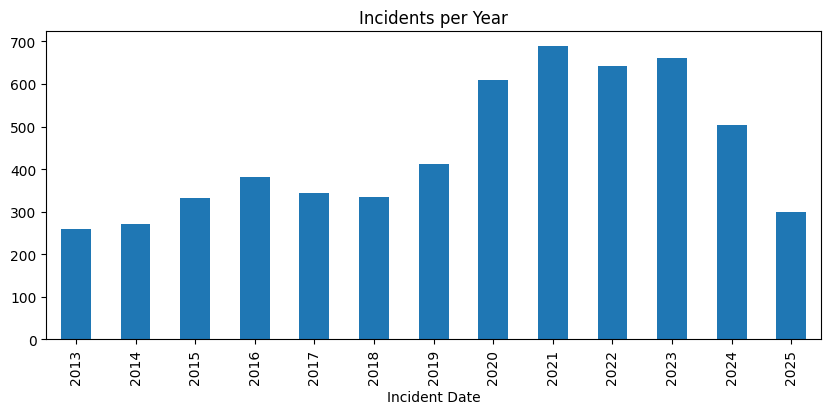

In [12]:
per_y = df.groupby(pd.to_datetime(df['Incident Date']).dt.year).size()

per_y.plot(kind='bar', figsize=(10,4), title='Incidents per Year')

Let's create a dynamic chart using Bokeh, a plotting library which generates interactive plots.

Let's first import the libraries:

In [13]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

In [14]:
output_notebook()

And we generate the plot:

In [16]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
monthly = df.groupby(df['Incident Date'].dt.to_period('M')).size()
monthly.index = monthly.index.to_timestamp()

p1 = figure(x_axis_type='datetime', title='Incidents by Month', width=800, height=400)
p1.xaxis.axis_label = "Month"
p1.yaxis.axis_label = "# Incidents"

p1.line(monthly.index, monthly.values, line_width=2)
p1.scatter(monthly.index, monthly.values, size=8, alpha=0.5)

hover = HoverTool(tooltips=[("Month", "@x{%b %Y}"), ("Incidents", "@y")], formatters={"@x": "datetime"})
p1.add_tools(hover)

show(p1)

There's much more to what we can do with these visualizing techniques. We can visualize the top areas (states/cities) where incidents occur, or for a more *per person* approach we can download population census data ([census.gov](https://www.census.gov/)) and use the populations to find top states/areas per capita.

This does not just limit to incidents, you can also use injuries and deaths as a measure of metrics as well.